---

# Multi-Model Analysis of Health Insurance Costs

#### Using Multi-Linear Regression & Artificial Neural Networks

The goal of this project is to find the health insurance cost incurred by individuals based on their age, gender, BMI, number of children, smoking habits, and geo-location. Three different models will be used and the results compared.

The phases of this project are as follows:

- Import Libraries & Dataset
- Exploratory Data Analysis & Visualizations
- Data Cleaning & Preprocessing
- Create Training & Test Sets
- Model 1 - Scikit-Learn Linear Regression Model
- Model 2 - Sagemaker Linear Learner Model
- Model 3 - Tensorflow & Keras Regression Artificial Neural Network
- Conclusion



---

### Import Libraries & Dataset

In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [330]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [331]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [332]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [333]:
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [334]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [335]:
len(df) # returned 1338

1338

### Initial EDA / Visualization

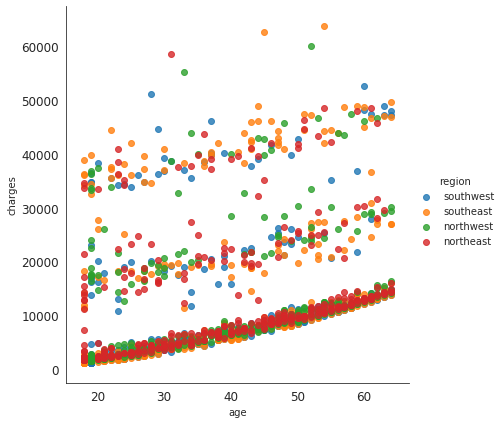

In [336]:
sns.set_style("white", {"axes.facecolor": "white"})
sns.lmplot(data=df, x='age', y='charges', fit_reg=False, hue='region', height=6, aspect=1)

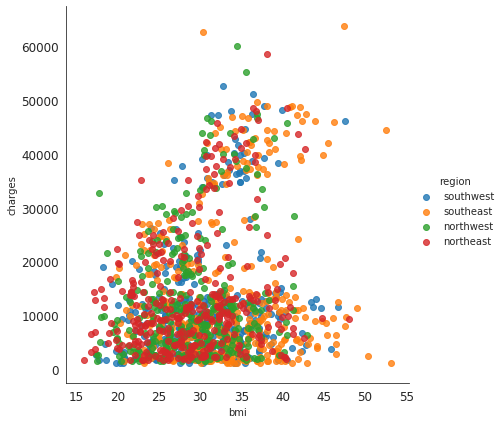

In [337]:
sns.lmplot(data=df, x='bmi', y='charges', fit_reg=False, hue='region', height=6, aspect=1)

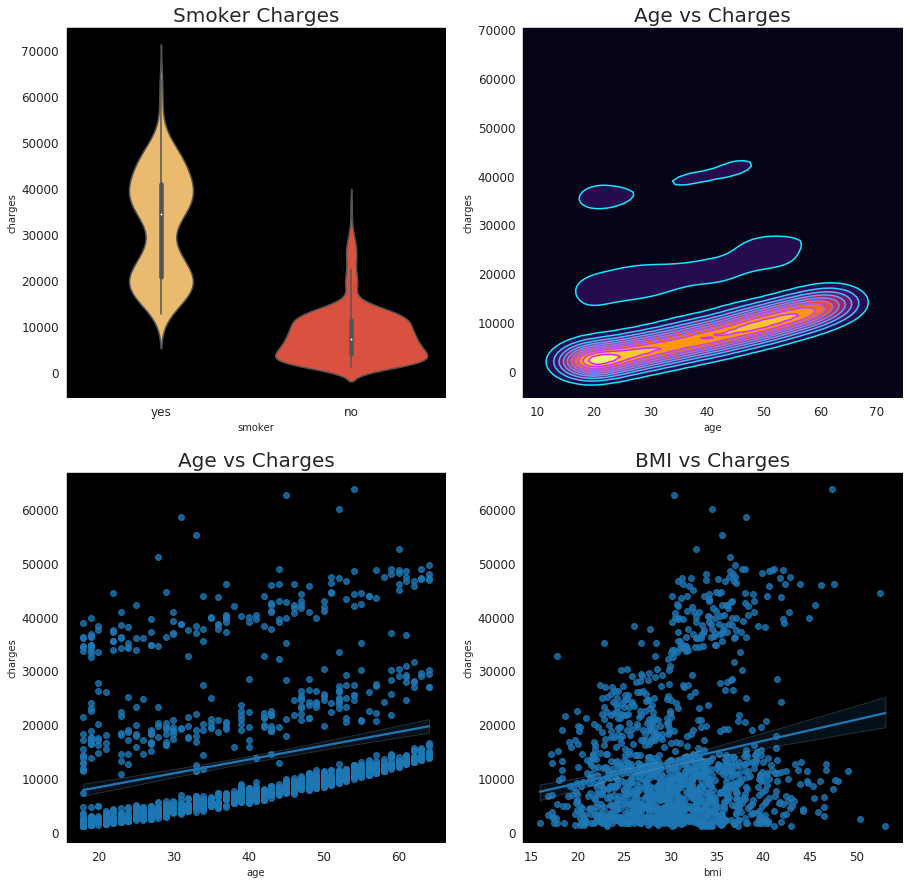

In [212]:
sns.set_style("dark", {"axes.facecolor": "black"})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
f, ax = plt.subplots(2, 2, figsize=(15,15))
#Plot [0,0]
k1 = sns.violinplot(data=df,  \
                    x='smoker', y='charges', ax=ax[0,0], \
                    palette='YlOrRd')
ax[0,0].set_title("Smoker Charges", fontsize=20)

#Plot [0,1]
k2 = sns.kdeplot(df.age, df.charges, \
                 shade = True, shade_lowest=True, cmap='inferno', \
                 ax=ax[0,1])
k2b = sns.kdeplot(df.age, df.charges, \
                 cmap='cool', \
                 ax=ax[0,1])
ax[0,1].set_title("Age vs Charges", fontsize=20)
#Plot [1,0]
k3 = sns.regplot(data=df, x='age', y='charges', ax=ax[1,0])
ax[1,0].set_title("Age vs Charges", fontsize=20)

#Plot [1,1]
k4 = sns.regplot(data=df, x='bmi', y='charges', ax=ax[1,1])
ax[1,1].set_title("BMI vs Charges", fontsize=20)
###############################

#test

plt.show()

#### BMI vs Charges - By Gender & Region

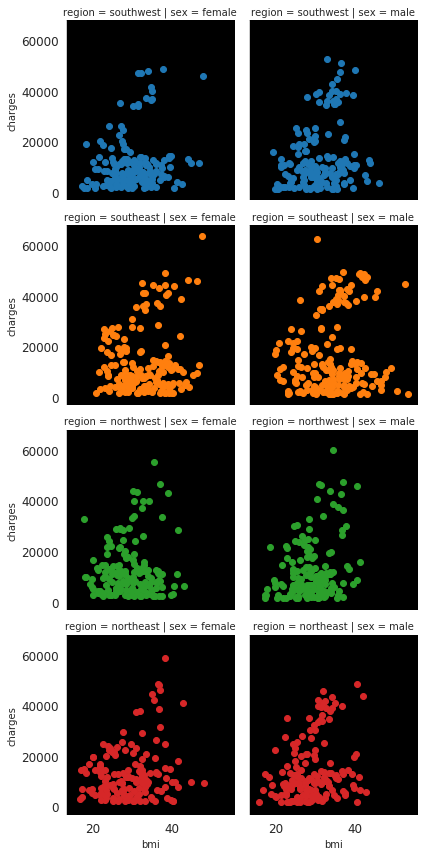

In [213]:
g = sns.FacetGrid(df, row='region', col='sex', hue='region')
g = g.map(plt.scatter, 'bmi', 'charges')

### Data Cleaning & Preprocessing

In [338]:
df_region = df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [339]:
df_age = df.groupby(by='age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


Check unique values in the 'sex' column

In [340]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

Convert categorical variables to numerical

In [341]:
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [342]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


Check unique values in the 'smoker' column

In [343]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

Convert categorical variables to numerical

In [344]:
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [345]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Check unique values in 'region' column

In [346]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Dummy variables

In [347]:
region_dummies = pd.get_dummies(df['region'], drop_first = True)
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [348]:
df = pd.concat([df, region_dummies], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [349]:
df.drop(['region'], axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


#### Correlations

In [350]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


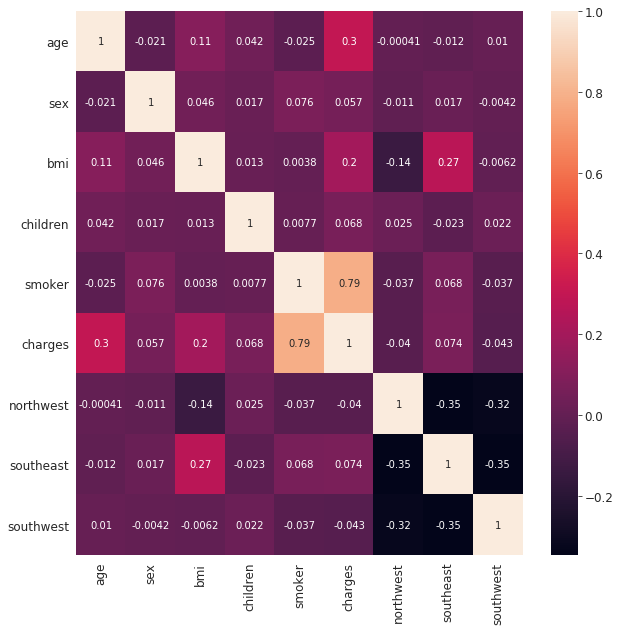

In [351]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

### Create Training & Testing Sets

In [352]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [353]:
X = df.drop(columns = ['charges'])
y = df['charges']

In [354]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [355]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [356]:
X.shape

(1338, 8)

In [357]:
y.shape

(1338,)

When trying to train a Linear Learner, its important to make sure the data type is float32

In [358]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [359]:
y = y.reshape(-1,1)

In [360]:
y.shape

(1338, 1)

In [361]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

#### Scaling the Data

In [362]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

#### Creating the Train Test Split

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [364]:
X_train.shape

(1070, 8)

In [365]:
X_test.shape

(268, 8)

In [366]:
y_train.shape

(1070, 1)

In [367]:
y_test.shape

(268, 1)

---

## Model 1 - Scikit-Learn Linear Regression Model


In [368]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [369]:
regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [370]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.7881955380379299

In [371]:
y_predict = regression_model_sklearn.predict(X_test)

In [372]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [373]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [374]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [375]:
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 5900.604 
MSE = 34817132.0 
MAE = 4183.171 
R2 = 0.7881955486269223 
Adjusted R2 = 0.7816533261906883


### Conclusion - Model 1 - Linear Regression Scikit-Learn 

The Linear Regression model from Scikit-Learn was able to achieve an accuracy of 78%. 

---

## Model 2 - Sagemaker Linear Learner Model

In [376]:
import sagemaker
import boto3

# create sagemaker session
sagemaker_session = sagemaker.Session()

# define S3 bucket & prefix(subfolder)
bucket = 'sagemaker-practical-a0157'
prefix = 'linear_learner'

# Get execution role for notebook instance
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::539478710417:role/service-role/AmazonSageMaker-ExecutionRole-20220617T101618


In [377]:
print('X Train:', X_train.shape, '\ny Train:', y_train.shape, '\nX Test:', X_test.shape, '\ny Test:', y_test.shape)

X Train: (1070, 8) 
y Train: (1070, 1) 
X Test: (268, 8) 
y Test: (268, 1)


In [378]:
# reshape to vector format
y_train = y_train[:,0]

In [273]:
import io # deals with different types of I/O
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common library

# sagemaker linear learner requires RecordIO format
# code to convert our data to RecordIO:
buf = io.BytesIO() # create in-memory byte array
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) # reset count back to 0

0

In [274]:
import os

# code to upload RecordIO data to S3
# key = name of file
key = 'linear-train-data'

# upload data to S3 bucket
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# print out training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-practical-a0157/linear_learner/train/linear-train-data


In [275]:
# create output placeholder in S3 bucket to store linear learner output
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-practical-a0157/linear_learner/output


In [282]:
# This code is used to get the training container of sagemaker's built-in algorithms
# just specify the name of the algorithm that we want to use

# obtain reference to linearlearner container image
# (all regression models are named 'estimators')
# don't have to specify region, sagemaker.image_uris.retrieve() will get the current region name using boto3.session

from sagemaker.image_uris import retrieve
container = sagemaker.image_uris.retrieve('linear-learner', boto3.Session().region_name)

In [ ]:
# Pass in the container, and type of instance that we will use for training
# output path and sagemaker into the Estimator
# We can specify as many instances as we would like to use.

linear = sagemaker.estimator.Estimator(container,
                                      role,
                                      train_instance_count = 1,
                                      train_instance_type = 'ml.c4.xlarge',
                                      output_path = output_location,
                                      sagemaker_session = sagemaker_session)

# Tune parameters such as number of features that we pass in, type of predictor,
# Train 32 different versions of the model and pick the best (this is built-in parameter optimization)

linear.set_hyperparameters(feature_dim = 8,
                          predictor_type = 'regressor',
                          mini_batch_size = 100,
                          epochs = 100,
                          num_models = 32,
                          loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the Linear Learner model

linear.fit({'train': s3_train_data})

# See progress using cloudwatch logs

#### Deploy Linear Learner Model

In [284]:
# Deploying the model to perform inference

linear_regressor = linear.deploy(initial_instance_count = 1,
                                instance_type = 'ml.m4.xlarge')

-------------!

In [308]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

# content_type overrides the data that will be passed to the deployed model
# (since the deployed model expects data in text/csv)

# serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type
# deserializer accepts two arguments, the result data and the response content type

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html


linear_regressor.serializer = CSVSerializer()
linear_regressor.deserializer = JSONDeserializer()

In [309]:
X_test.shape

(268, 8)

In [ ]:
# making predictions on the test data

result = linear_regressor.predict(X_test)
result

In [312]:
# Since the result is in json format, we access the scores by iterating through the scores

predictions = np.array([r['score'] for r in result['predictions']])
predictions.shape

(268,)

In [313]:
predictions

array([-0.6040839 ,  0.77531731, -0.34775037, -0.55262256,  0.59346044,
       -0.81793952, -0.72445792, -0.93638664, -0.00911731, -0.91901392,
       -0.96765059, -0.89865392, -0.16603979, -0.16884337, -0.70540398,
       -0.75868964, -0.95040739, -0.16944966, -0.10690863,  1.08282614,
       -0.10560998, -0.84121543, -0.15199709,  1.00781238, -1.00299335,
       -0.17793363, -0.56815255, -0.99496067, -1.03002286, -0.52485406,
       -0.39788774, -0.77465671, -0.59350795,  0.72565365, -0.3980526 ,
        1.18945587, -0.82077205, -0.28257114, -0.14780653, -0.49223763,
       -0.73489839, -0.79036802,  0.96144593, -0.47275275,  1.120579  ,
       -0.93515515, -0.55023783, -0.16579373,  1.22122025,  0.68102658,
        0.72824085, -0.45651326, -0.35051817,  0.56394565, -0.74169767,
        1.06966197, -0.83620816,  0.04867385, -0.98806775, -0.52927178,
       -0.63804483, -0.02251992, -0.81490535, -0.65717506, -0.10744461,
        0.95416963, -0.81805408, -0.67723858,  0.36277139, -1.03

In [314]:
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)


In [315]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 7619.881 
MSE = 58062587.649040505 
MAE = 3662.5035617040544 
R2 = 0.6259983523773167 
Adjusted R2 = 0.6144461779333728


In [316]:
# delete endpoint
linear_regressor.delete_endpoint()

#### Conclusion - Model 2 - SageMaker Linear Learner

With an R2 of only 0.62, the Linear Learner model does not seem to be optimal. Let's try a more complex Artificial Neural Network based Regression Model

---

## Model 3 - Tensorflow & Keras Regression Artificial Neural Network

In [ ]:
!pip install tensorflow

In [318]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [319]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [320]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 1s 6ms/step - loss: 0.6412 - val_loss: 0.2745
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3679 - val_loss: 0.3535
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3055 - val_loss: 0.2396
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2752 - val_loss: 0.2443
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2763 - val_loss: 0.2503
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2541 - val_loss: 0.2468
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2524 - val_loss: 0.3023
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2398 - val_loss: 0.2336
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2140 - val_loss: 0.2692
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2325 - val_loss: 0.2456
Epoch 11/

In [321]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print('Accuracy : {}'.format(accuracy_ANN))

9/9 [==============================] - 0s 2ms/step - loss: 0.1519
Accuracy : 0.8480939865112305


In [322]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

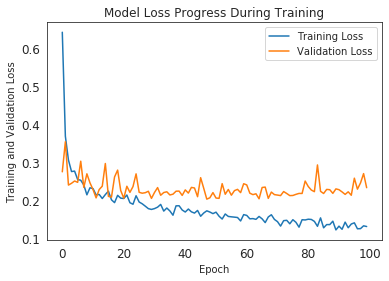

In [324]:
sns.set_style("white", {"axes.facecolor": "white"})
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Values')

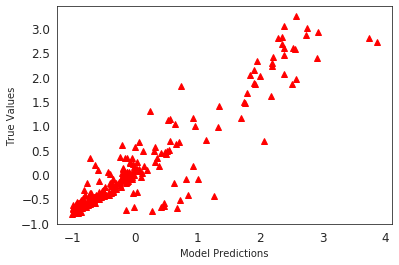

In [325]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [326]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

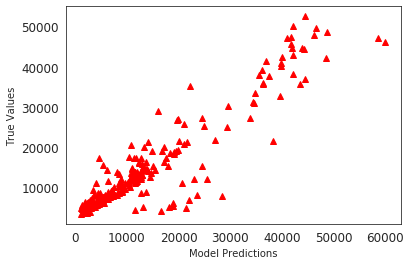

In [327]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [328]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 4718.127 
MSE = 22260728.0 
MAE = 3272.0415 
R2 = 0.856610790011826 
Adjusted R2 = 0.852181779664701


#### Conclusion - Model 3 - Tensorflow & Keras Regression Artificial Neural Network

This is by far the most successful model, with an accuracy of 85%. More tuning with additional neurons is possible.

---

## Conclusion

Model 1 - Scikit-Learn Linear Regression
- sklearn's Linear Regression achieved 78% accuracy.

Model 2 - Sagemaker Linear Learner:
- Sagemaker's Linear Learner achieved 62% accuracy.

Model 3 - Tensorflow & Keras Regression Artificial Neural Network:
- Tensorflow & Keras Regression ANN achieved 85% accuracy.


Regression ANN is the clear winner, achieving 85% accuracy with room for improvement